In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [207]:
#original dataset

dat = pd.read_csv('trajectories-0400pm-0415pm_editted.csv')
data = dat[['Vehicle_ID','Epoch_ms','Org_Zone','Dest_Zone',
           'Intersection','Section','Direction']]


In [208]:
#get unique cars in dataset

data.groupby('Vehicle_ID').first()

,Epoch_ms,Org_Zone,Dest_Zone,Intersection,Section,Direction
Vehicle_ID,,,,,,
2,1163033200,102,214,1,0,2
6,1163030800,114,213,5,0,4
8,1163031100,123,201,0,1,4
11,1163038000,120,201,0,4,4
13,1163034600,102,203,1,0,2
15,1163034800,101,214,0,1,2
17,1163036300,101,214,0,1,2
21,1163039100,101,202,0,1,2
22,1163043500,115,214,5,0,2


In [209]:
## just for an internal check

south = data[data['Direction'] == 4]
south.groupby('Vehicle_ID').first()

,Epoch_ms,Org_Zone,Dest_Zone,Intersection,Section,Direction
Vehicle_ID,,,,,,
6,1163030800,114,213,5,0,4
8,1163031100,123,201,0,1,4
11,1163038000,120,201,0,4,4
25,1163045700,122,202,2,0,4
28,1163047900,122,202,2,0,4
29,1163045700,114,201,0,6,4
33,1163049300,123,201,1,0,4
42,1163053400,122,202,2,0,4
74,1163077100,112,201,4,0,4


In [210]:
#filter cars headed North only

North = data[data['Direction'] == 2]
North.groupby('Vehicle_ID').first()

,Epoch_ms,Org_Zone,Dest_Zone,Intersection,Section,Direction
Vehicle_ID,,,,,,
2,1163033200,102,214,1,0,2
13,1163034600,102,203,1,0,2
15,1163034800,101,214,0,1,2
17,1163036300,101,214,0,1,2
21,1163039100,101,202,0,1,2
22,1163043500,115,214,5,0,2
24,1163044800,101,202,0,1,2
27,1163045500,115,214,5,0,2
31,1163047800,115,214,5,0,2


In [211]:
#Apparently, cars coming from the North were also labelled as having Direction2

#get first entry for start time
N1 = North[North['Org_Zone'].isin([113,114,115]) == False].groupby('Vehicle_ID').first()

#get last entry for end time
N2 = North[North['Org_Zone'].isin([113,114,115]) == False].groupby('Vehicle_ID').last()

In [212]:
# Filter out cars that exit on 10th street

Final = N1[N1['Dest_Zone'].isin([201,223,202])==False].groupby('Vehicle_ID').first()

In [213]:
#get first event recorded
origin = Final['Epoch_ms'].min()

def start(row):
    return((row-origin)/1000)

Final['start']=Final['Epoch_ms'].apply(start)

Final_last = N2[N2['Dest_Zone'].isin([201,223,202])==False]

Final['end'] = Final_last['Epoch_ms'].apply(start)

In [214]:
#sort values by arrival time in preparation for interarrival time computation

Final = Final.sort_values(['start'])

# Uncomment to view final dataset
#Final

In [215]:
#get unique start times and create dictionary to hold lambdas

org_zones = Final['Org_Zone'].unique()

#original count of cars
orig_numb = {}

lambdas = {}

In [216]:
# lambda is 1/(mean interarrival time)

for i in org_zones:
    lambdas[i] = 1./(Final[Final['Org_Zone'] == i]['start'].diff().mean())
    orig_numb[i] = Final[Final['Org_Zone'] == i].shape[0]
print(lambdas)
print(orig_numb)

{102: 0.026833631484794278, 101: 0.10174586657417042, 112: 0.013031013812874642, 123: 0.030003750468808602, 111: 0.015031942878617064, 103: 0.008724915866882711, 120: 0.007061149555147578, 118: nan, 116: nan, 121: 0.0074887668497254116, 105: 0.002744990392533626, 122: 0.004662004662004662}
{102: 25, 101: 89, 112: 11, 123: 25, 111: 13, 103: 8, 120: 6, 118: 1, 116: 1, 121: 4, 105: 2, 122: 2}


In [217]:
1./Final[Final['Org_Zone'] == 101]['start'].diff().mean()

0.10174586657417042

In [218]:
Distributions = {}
Dist_sums = {}
keys = [x for x in lambdas.keys() if np.isnan(lambdas[x]) != True ]
for key in keys:
    Distributions[key] = np.random.poisson(lambdas[key], 60*15)
    Dist_sums[key] = np.sum(Distributions[key])

## Now let's try validating our choice of lambda
Plot a distribution of the total number of cars generated by our lambda choices

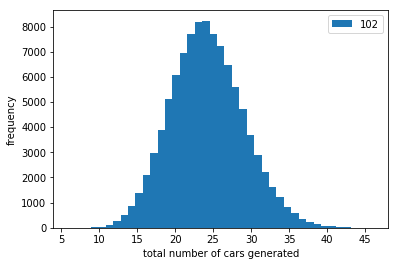

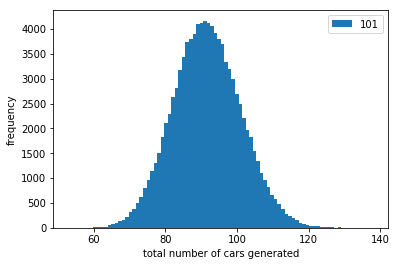

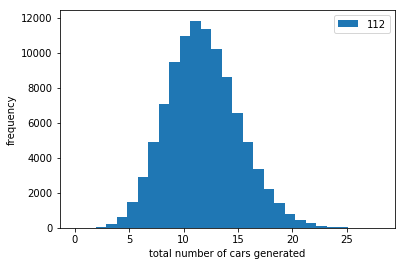

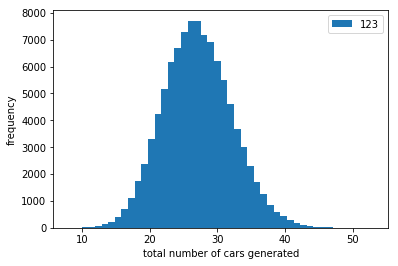

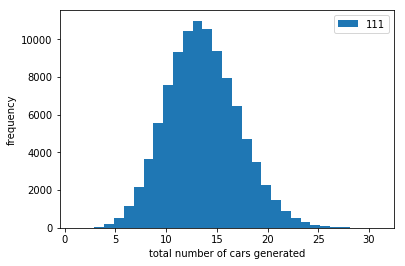

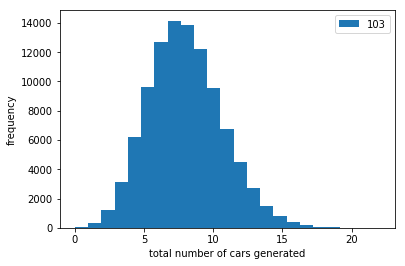

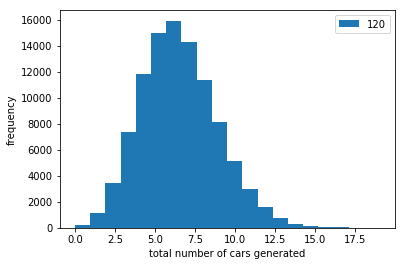

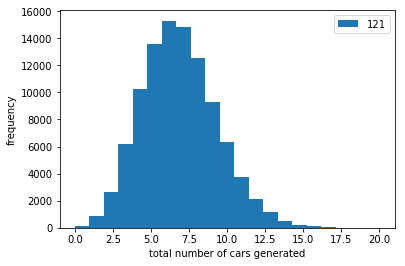

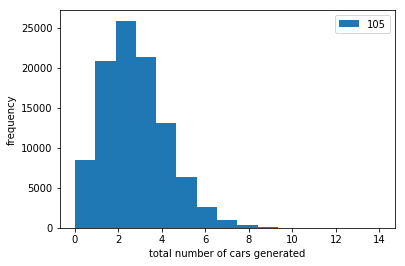

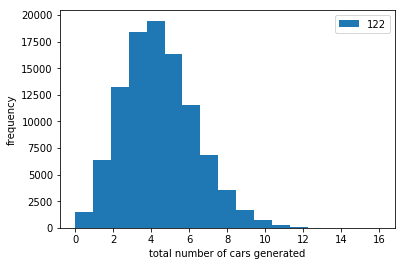

In [219]:
import matplotlib.pyplot as plt

#increase trials for asymptotic behavior
trials = int(1e5)
for key in keys:
    D = float('inf')*np.ones(trials)
    dmin = float('inf'); dmax=0
    for i in range(trials):
        S = np.sum(np.random.poisson(lambdas[key], 60*15))
        if S < dmin:
            dmin = S
        if S > dmax:
            dmax = S
        D[i] = S
    plt.figure(str(key))
    N = dmax - dmin + 1
    plt.hist(D,N, label=str(key))
    plt.legend()
    plt.xlabel("total number of cars generated")
    plt.ylabel('frequency')
    plt.show(block=False)
    